**1. –ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–≥–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è —É–±–µ–¥–∏—Ç–µ—Å—å –≤ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –¥–∞–Ω–Ω—ã—Ö.**

<ipython-input-2-abe6f82be51b>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'], dayfirst=True, errors='coerce')
<ipython-input-2-abe6f82be51b>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'], dayfirst=True, errors='coerce')
<ipython-input-2-abe6f82be51b>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], dayfirst=True, errors='coerce')
<ipython-

–î–æ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: (85907, 11)
–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: (85907, 11)


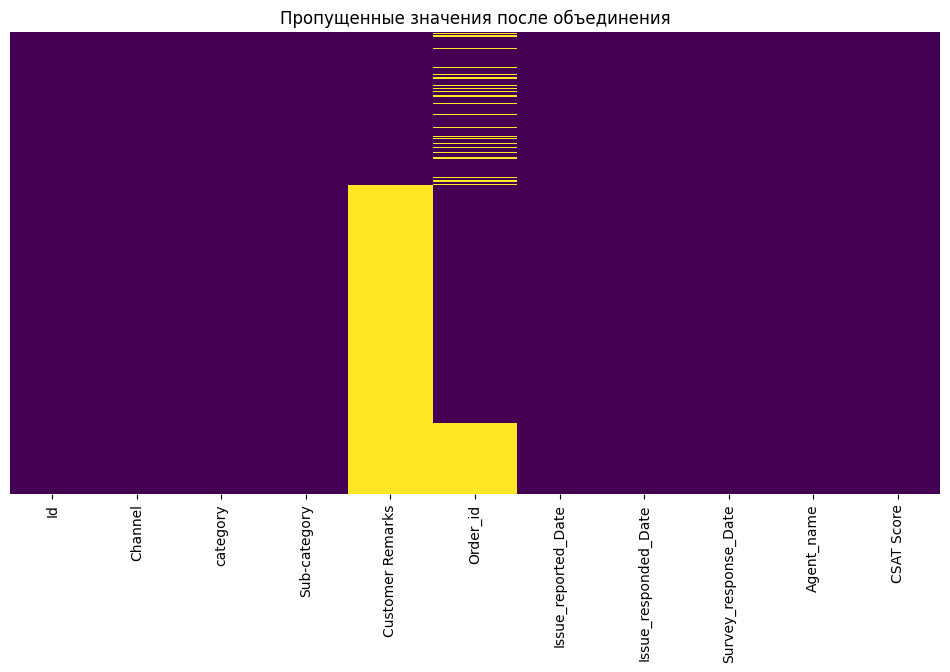

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
data1 = pd.read_csv('issues1.csv', index_col=0)
data2 = pd.read_csv('issues2.csv', index_col=0)
data3 = pd.read_csv('issues4.csv', index_col=0)

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ data2
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç data2 (–∏—Å–ø–æ–ª—å–∑—É–µ–º dayfirst=True –¥–ª—è dd/mm/yyyy)
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'], dayfirst=True, errors='coerce')
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'], dayfirst=True, errors='coerce')
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], dayfirst=True, errors='coerce')

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç data1
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], dayfirst=True, errors='coerce')
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], dayfirst=True, errors='coerce')
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], dayfirst=True, errors='coerce')

# –û–±—Ä–∞–±–æ—Ç–∫–∞ data3
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'], errors='coerce')
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'], errors='coerce')
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'], errors='coerce')

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏–º–µ–Ω–∏ –∞–≥–µ–Ω—Ç–∞
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) and len(x.split()) > 1 else np.NaN
)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∏ –æ—á–∏—Å—Ç–∫–∞
data_123 = pd.concat([data1, data2, data3], ignore_index=True)

# –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
print("–î–æ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:", data_123.shape)
data_123 = data_123.drop_duplicates()
print("–ü–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:", data_123.shape)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤
plt.figure(figsize=(12, 6))
sns.heatmap(data_123.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è")
plt.show()


**2. –ü—Ä–∏ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏ –ø–µ—Ä–≤–æ–π –∏ –≤—Ç–æ—Ä–æ–π —Ç–∞–±–ª–∏—Ü—ã –≤—ã–≤–µ–¥–∏—Ç–µ –ø–æ –∫–∞–∂–¥–æ–º—É —Å—Ç–æ–ª–±—Ü—É –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–ª–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤—ã—Ä–∞–∂–∞—é—Ç—Å—è –ø–æ —Å–æ–æ—Ç–Ω–æ—Å–∏–º—ã–º —à–∫–∞–ª–∞–º.**

<ipython-input-3-ee67ddfaf23c>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1[col] = pd.to_datetime(data1[col], errors='coerce', dayfirst=True)
<ipython-input-3-ee67ddfaf23c>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2[col] = pd.to_datetime(data2[col], errors='coerce', dayfirst=True)
<ipython-input-3-ee67ddfaf23c>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2[col] = pd.to_datetime(data2[col], errors='coerce', dayfirst=True)


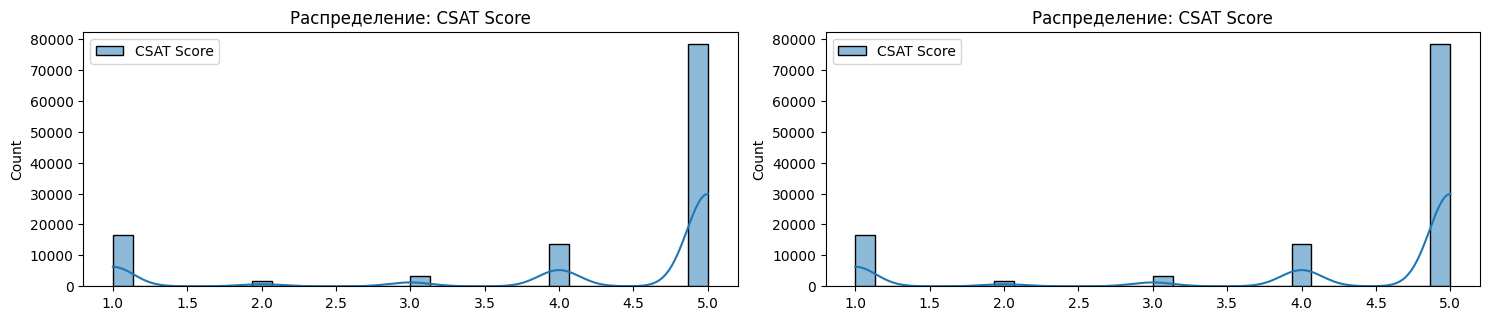

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞
data1 = pd.read_csv('issues1.csv', index_col=0)
data2 = pd.read_csv('issues2.csv', index_col=0)

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –∫–æ–Ω—Ñ–ª–∏–∫—Ç–æ–≤
data2 = data2.rename(columns={
    'channel_name': 'Channel_2',
    'Reported at': 'Issue_reported_Date_2',
    'Responded at': 'Issue_responded_Date_2',
    'Survey responded at': 'Survey_response_Date_2',
})

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –¥–∞—Ç –∫ –æ–¥–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É
for col in ['Issue_reported_Date', 'Issue_responded_Date', 'Survey_response_Date']:
    data1[col] = pd.to_datetime(data1[col], errors='coerce', dayfirst=True)
for col in ['Issue_reported_Date_2', 'Issue_responded_Date_2', 'Survey_response_Date_2']:
    data2[col] = pd.to_datetime(data2[col], errors='coerce', dayfirst=True)

# –û–±—Ä–µ–∑–∞–µ–º data1 –∏ data2 –¥–æ –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Å—Ç—Ä–æ–∫, –µ—Å–ª–∏ –æ–Ω–∏ —Ä–∞–∑–Ω—ã–µ
min_len = min(len(data1), len(data2))
data1_trimmed = data1.iloc[:min_len].reset_index(drop=True)
data2_trimmed = data2.iloc[:min_len].reset_index(drop=True)

# –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ
horiz_data = pd.concat([data1_trimmed, data2_trimmed], axis=1)

# –û—Ç–±–æ—Ä —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
numeric_cols = horiz_data.select_dtypes(include=['float64', 'int64']).columns

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
plt.figure(figsize=(15, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.histplot(horiz_data[col].dropna(), kde=True, bins=30)
    plt.title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: {col}")
plt.tight_layout()
plt.show()


–≠—Ç–æ—Ç –∫–æ–¥ –ø–æ–º–æ–≥–∞–µ—Ç —É–±–µ–¥–∏—Ç—å—Å—è, —á—Ç–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –¥–≤—É—Ö —Ç–∞–±–ª–∏—Ü –ª–µ–∂–∞—Ç –≤ —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º—ã—Ö —à–∫–∞–ª–∞—Ö.

–ï—Å–ª–∏ —à–∫–∞–ª—ã —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ –æ—Ç 0 –¥–æ 1, –¥—Ä—É–≥–æ–π –æ—Ç 0 –¥–æ 1000), —ç—Ç–æ –ø–æ–≤–æ–¥ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å –∏—Ö –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–µ–π.

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, —á–µ—Ä–µ–∑ countplot), –µ—Å–ª–∏ –Ω—É–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π.

**3. –ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ —Ç—Ä–µ—Ç—å–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è —É–±–µ–¥–∏—Ç–µ—Å—å –±–æ–ª–µ–µ —è–≤–Ω–æ, —á—Ç–æ –æ–±–∏–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –æ—à–∏–±–∫–æ–π –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –±–æ–ª—å—à–µ, —á–µ–º –æ–¥–Ω—É —Ç–æ—á–µ—á–Ω—É—é –ø—Ä–æ–≤–µ—Ä–∫—É.**

<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
<ipython-input-4-5164acc5f6bb>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateu

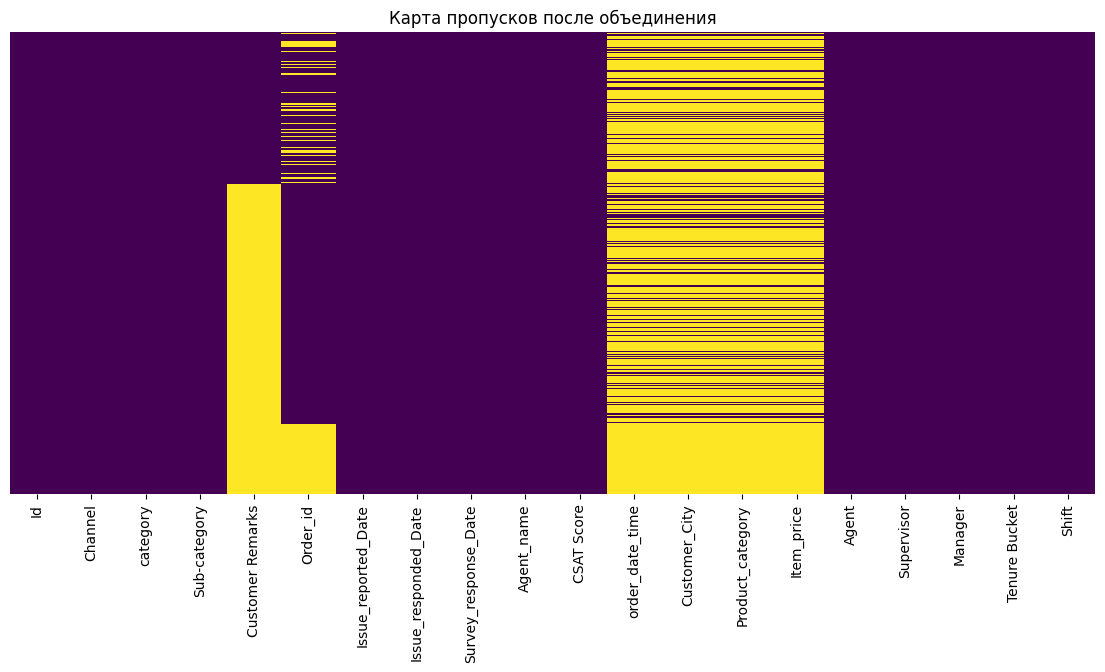

üîé –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ Order_id: 24863 –∏–∑ 111622 (22.27%)
üîé –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ Agent: 0 –∏–∑ 111622 (0.00%)
‚ö†Ô∏è –ê–≥–µ–Ω—Ç–æ–≤ –≤ issues, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ agent_data: 0
–ü—Ä–∏–º–µ—Ä:  []
‚ö†Ô∏è –ó–∞–∫–∞–∑–æ–≤ –≤ issues, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ orders: 49710
–ü—Ä–∏–º–µ—Ä:  ['1ac26dca-3b34-47f9-895c-6dfffed0c43e', '8de59328-1732-4d20-a001-c30601c1173b', 'f4166efb-8946-47b9-8cc4-332fe6a40964', 'cca8d4d0-ab51-403a-a7f2-15af2c0d0c47', '452fd482-750d-4b64-ac05-aeb578f8816c']


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
data1 = pd.read_csv('issues1.csv', index_col=0)
data2 = pd.read_csv('issues2.csv', index_col=0)
data3 = pd.read_csv('issues4.csv', index_col=0)
orders_data = pd.read_csv('orders.csv', index_col=0)
agent_data = pd.read_csv("agents.csv", index_col=0)

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –∏ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})
orders_data = orders_data.rename(columns={'Id': 'Order_id'})

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –¥–∞—Ç
for df in [data1, data2, data3]:
    for col in ['Issue_reported_Date', 'Issue_responded_Date', 'Survey_response_Date']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∏–º–µ–Ω –∞–≥–µ–Ω—Ç–æ–≤
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.nan
)
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.nan
)

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ data1 + data2 + data3
data_12 = pd.concat([data1, data2])
data_123 = pd.concat([data_12, data3])

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Å –∑–∞–∫–∞–∑–∞–º–∏
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Å –∞–≥–µ–Ω—Ç–∞–º–∏
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name')

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤
plt.figure(figsize=(14, 6))
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("–ö–∞—Ä—Ç–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è")
plt.show()

# ==== –ü–æ–¥—Ä–æ–±–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞: –Ω–µ –æ—à–∏–±–∫–∞ –ª–∏ —ç—Ç–æ? ====

# 1. –î–æ–ª—è —Å—Ç—Ä–æ–∫ –±–µ–∑ –∑–∞–∫–∞–∑–æ–≤
missing_orders = data_with_agents['Order_id'].isna().sum()
print(f"üîé –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ Order_id: {missing_orders} –∏–∑ {len(data_with_agents)} ({missing_orders / len(data_with_agents):.2%})")

# 2. –î–æ–ª—è —Å—Ç—Ä–æ–∫ –±–µ–∑ –¥–∞–Ω–Ω—ã—Ö –æ–± –∞–≥–µ–Ω—Ç–µ
missing_agents = data_with_agents['Agent'].isna().sum()
print(f"üîé –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ Agent: {missing_agents} –∏–∑ {len(data_with_agents)} ({missing_agents / len(data_with_agents):.2%})")

# 3. –ï—Å—Ç—å –ª–∏ Agent_name, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ agent_data?
agent_names_in_issues = set(data_123['Agent_name'].dropna())
agent_names_in_agents = set(agent_data['Agent_name'].dropna())
unknown_agents = agent_names_in_issues - agent_names_in_agents
print(f"‚ö†Ô∏è –ê–≥–µ–Ω—Ç–æ–≤ –≤ issues, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ agent_data: {len(unknown_agents)}")
print("–ü—Ä–∏–º–µ—Ä: ", list(unknown_agents)[:5])

# 4. –ï—Å—Ç—å –ª–∏ Order_id, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ orders_data?
order_ids_in_issues = set(data_123['Order_id'].dropna())
order_ids_in_orders = set(orders_data['Order_id'].dropna())
unknown_orders = order_ids_in_issues - order_ids_in_orders
print(f"‚ö†Ô∏è –ó–∞–∫–∞–∑–æ–≤ –≤ issues, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ orders: {len(unknown_orders)}")
print("–ü—Ä–∏–º–µ—Ä: ", list(unknown_orders)[:5])


**4. –ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ —Ç—Ä–µ—Ç—å–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ –≤–∏–¥—ã —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–π. –ö–∞–∫ —ç—Ç–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç—Å—è –Ω–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –¥–∞—Ç–∞—Å–µ—Ç–∞?**

In [5]:
# –í–∞—Ä–∏–∞–Ω—Ç—ã —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–π
data_inner = data_123.merge(agent_data, how='inner', on='Agent_name')
data_left = data_123.merge(agent_data, how='left', on='Agent_name')
data_outer = data_123.merge(agent_data, how='outer', on='Agent_name')

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤
print("üîç Inner join:", data_inner.shape)
print("üîç Left join: ", data_left.shape)
print("üîç Outer join:", data_outer.shape)

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
def count_nans(df, label):
    print(f"{label} ‚Äî –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ Agent:")
    print(df['Agent'].isna().sum(), "–∏–∑", len(df), f"({df['Agent'].isna().mean():.2%})")

count_nans(data_inner, "Inner join")
count_nans(data_left,  "Left join")
count_nans(data_outer, "Outer join")


üîç Inner join: (111622, 16)
üîç Left join:  (111622, 16)
üîç Outer join: (111622, 16)
Inner join ‚Äî –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ Agent:
0 –∏–∑ 111622 (0.00%)
Left join ‚Äî –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ Agent:
0 –∏–∑ 111622 (0.00%)
Outer join ‚Äî –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ Agent:
0 –∏–∑ 111622 (0.00%)


**5. –ò–∑—É—á–∏—Ç–µ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—é pandas –≤ —á–∞—Å—Ç–∏ –æ–ø–∏—Å–∞–Ω–∏—è –º–µ—Ç–æ–¥–æ–≤ merge –∏ join.**

pd.merge()

–ú–µ—Ç–æ–¥ merge() –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –≥–∏–±–∫–æ–≥–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è –¥–≤—É—Ö DataFrame –ø–æ –∑–∞–¥–∞–Ω–Ω—ã–º –∫–ª—é—á–∞–º (–∞–Ω–∞–ª–æ–≥ SQL JOIN).

DataFrame.join()

–ú–µ—Ç–æ–¥ join() ‚Äî —ç—Ç–æ —É–¥–æ–±–Ω–∞—è –æ–±—ë—Ä—Ç–∫–∞ –≤–æ–∫—Ä—É–≥ merge() –¥–ª—è –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è –ø–æ –∏–Ω–¥–µ–∫—Å–∞–º –∏–ª–∏ –ø–æ –æ–¥–Ω–æ–º—É —Å—Ç–æ–ª–±—Ü—É.

**6. –ü–æ–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å —Ñ–æ—Ä–º–∞—Ç–æ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –¥–∞—Ç strftime.**

–§–æ—Ä–º–∞—Ç strftime (–æ—Ç string format time) –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ Python –¥–ª—è —Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Ä–∞–∑–±–æ—Ä–∞ –¥–∞—Ç –∏ –≤—Ä–µ–º–µ–Ω–∏ –≤ –≤–∏–¥–µ —Å—Ç—Ä–æ–∫.

–û–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç –∑–∞–¥–∞—Ç—å —à–∞–±–ª–æ–Ω, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –¥–∞—Ç–∞ –∏/–∏–ª–∏ –≤—Ä–µ–º—è –±—É–¥–µ—Ç —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∞ –≤ —Å—Ç—Ä–æ–∫—É –∏–ª–∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–∞ –∏–∑ —Å—Ç—Ä–æ–∫–∏.




%Y	–ì–æ–¥ (4 —Ü–∏—Ñ—Ä—ã)	2023

%y	–ì–æ–¥ (2 —Ü–∏—Ñ—Ä—ã)	23

%m	–ú–µ—Å—è—Ü (01-12)	04